<a href="https://colab.research.google.com/github/leeelyehezkel/Image-processing/blob/main/Image_processing_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Lecture 1

##Class Exercise 1

###Reading an image

In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


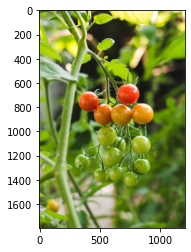

In [ ]:
#instructions for reading an image
#first, define a working folder using a variable
folder_path = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class01' #navigation directions
#then, read the image
import skimage.io as io #io is an input output module
image_tomato = io.imread(fname = f'{folder_path}/images/tomato.jpg') #identify destination - 'you are here'
#image_tomato is our variable in the code, but tomato.jpg is the name of the file in the given path
#display image
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(image_tomato)
#in skimage, images are stored as numpy arrays

###Image info

In [ ]:
print(image_tomato.shape) #gives height, width, and dimensions (RGB)
print(image_tomato.min())
print(image_tomato.max())
print(image_tomato.dtype) #gives image data type
#data is classified by 'bit', and bit-depth describes how many colors a pixel can store
#for example, dtype = uint8 means 8-bit, and each pixel can be one of 255 colors (the range)

In [ ]:
#display only the red layer of the image
red_layer = image_tomato[:,:,0] #the third dimension refers to the RGB channels
plt.imshow(red_layer)
#the red layer will now be a 2D array instead of 3D
red_layer.shape

###Clipping an image

In [ ]:
#remember, we use a left-hand image orientation system
#the origin is at the upper left corner of the graph, so there is no minus coordinate
clipped_tomato = image_tomato[600:780, 600:850, :]
plt.imshow(clipped_tomato)

###Saving an image

In [ ]:
#we can specify the format we want to save
save_path = '/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Leeel.Yehezkel/HW01'
io.imsave(fname = f'{save_path}tomato_clipped_2712022.jpg', arr = clipped_tomato)
#first argument is destination path, second is array source

###Extracting image metadata

In [ ]:
#import libraries
from PIL import Image
from PIL.ExifTags import TAGS
#path to image - this is like navigation directions to destination
imagename = f'{folder_path}/images/cow.tif'
#read image data using PIL - like identifying destination
image = Image.open(imagename)
#extract EXIF data 
exifdata = image.getexif()
#then decode
# iterating over all EXIF data fields
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

#Lecture 2

##Pre-lecture videos

###Color Science

*  Hue - the actual color on the spectrum 
*  Value - how bright something is relative to something else
* Saturation - intensity of the color



###Spectrum of Light

* Blue light has a shorter wavelength, red light has a longer one
* Sunlight contains all visible colors
* Spectral power distribution - intensity vs. wavelength (nm) graph 

###RGB Color Model

* A pixel contains different amounts of red, green, and blue

###HSL Color Model

* HSL - hue, saturation, lightness
* Hue - color, position around the wheel
* Saturation - purity of color, distance from center of wheel (saturation is outward)
* Lightness - separate slider

###Color Contrast

* Contrast - the difference in brightness or illumination

###Intro to Color Space

* Methods of counting colors - give each RGB a percent value
* Color space - a color cube with three axes RGB, and colors are a point on the cube

###HSL Color Space

* Artists use the HSL wheel
* Each HSL setting converts to a point on the 3D RGB cube
* Each color has straight light that changes in saturation
* The lightness dimension takes slices of the cube-turned-cylinder

###CIE Chromaticity Diagram

* Spectral colors - all colors perceptible to the average human
* CIE chromaticity diagram - relatively triangle-shaped with continuity for ease of finding the midpoint between two colors

###Intro to Spectral Remote Sensing

* Imaging spectrometers are high-powered cameras that are used to track changes in the environment
* How? They can record non-visible wavelengths
* Bands - groups of wavelengths (e.g. ingrared, etc.)
* High spectral resolution - more bands that are spectrally narrow
* Low spectral resolution - fewer bands that are spectrally wider
* Objects appear as the color they reflect black
* RGB image - composed of pixels with values of RGB reflected
* Spectral signature - reflectance vs. wavelength (nm), amount of energy vs. range of wavelengths (RGB)
* NDVI - plants reflect a lot of near-infrared light
* Imaging spectrometers produce multispectral (many bands, more than 3) and hyperspectral (up to hundreds) data 

###NDVI - Normalized Difference Vegetation Index

* Used to identify vegetation and provide a measure of its health
* Looks at the spectral signature of vegetation: wavelength - x-axis, reflectance - y-axis
* Unhealthy vegetation - decrease in near-infrared, and increase of red because there is less chlorophyll to absorb the red light
* NDVI = (NIR - Red)/(NIR + Red)
* -1 < NDVI < 1
* Healthy - NDVI --> +1
* Can detect water - NDVI < 0

##Class Exercise 2

###Convert RGB to Grayscale

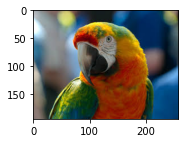

In [ ]:
#working folder
folder_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class02'
#import libraries
import skimage
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread(fname = f'{folder_path}/images/parrot.jpeg') #read image
plt.figure(figsize = (35,2)) #resize figure
plt.imshow(image)

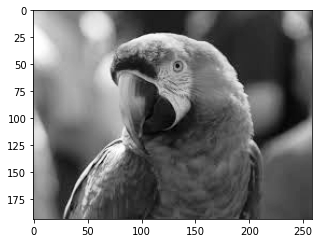

In [ ]:
#convert to grayscale and display
gray_image = skimage.color.rgb2gray(image)
plt.figure(figsize = (5, 5))
plt.imshow(gray_image, cmap = 'Greys_r')

In [ ]:
#how many layers/channel does the grayscale image have?
gray_shape = gray_image.shape
if len(gray_shape) == 3:
  print('The grayscale image has', gray_shape[2], 'layers/channels.')
else:
  print('The grayscale image has one layer/channel.')

The grayscale image has one layer/channel.


###Using Subplot

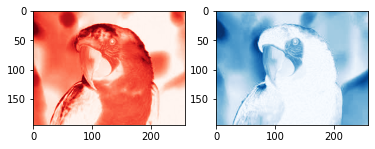

In [ ]:
#plt.subplot(rows, columns, number of plot)
red_parrot = image[:,:,0]
blue_parrot = image[:,:,2]
plt.subplot(1,2,1)
plt.imshow(red_parrot, cmap = 'Reds')

plt.subplot(1,2,2)
plt.imshow(blue_parrot, cmap = 'Blues')

In [ ]:
#restack the channels together
#add red channel for stacking because we need 3 dimensions
green_parrot = image[:,:,1]
parrot_stacked = np.stack((red_parrot, green_parrot, blue_parrot), axis = -1)
parrot_stacked.shape

(194, 259, 3)

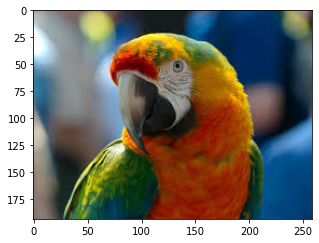

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(parrot_stacked)
#axis says the index of the dimension we want to stack (row, cols, channels)
#in this case it's the last one, so -1

###Using OpenCV

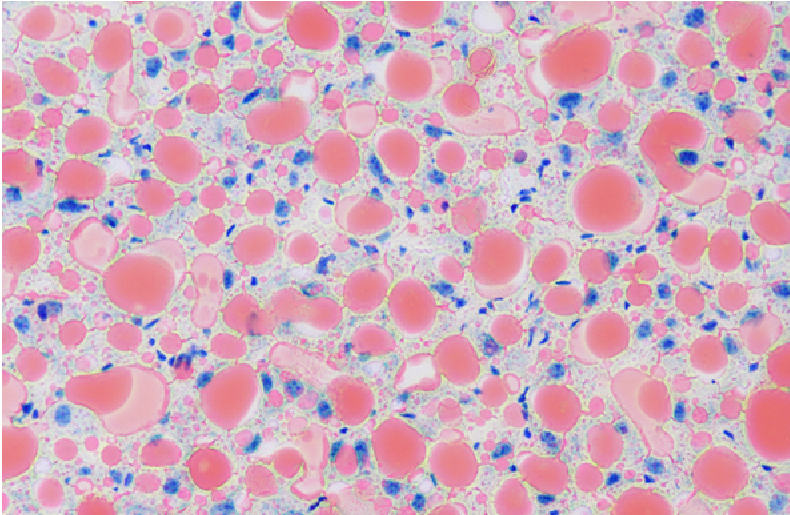

In [ ]:
#import libraries
import cv2
from google.colab.patches import cv2_imshow
#image is read as BGR
image = cv2.imread(f'{folder_path}/images/mouse_liver.jpg')
#however, it's displayed as RGB
cv2_imshow(image)

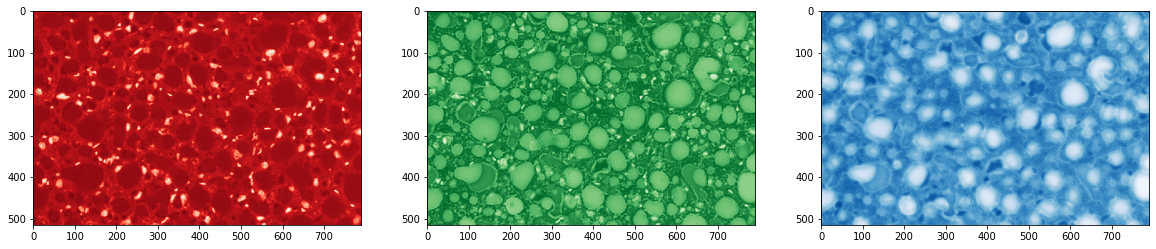

In [ ]:
#split into channels of colored image
b,g,r = cv2.split(image)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(r, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(g, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(b, cmap='Blues')
#the nuclei are clearest in the red subplot

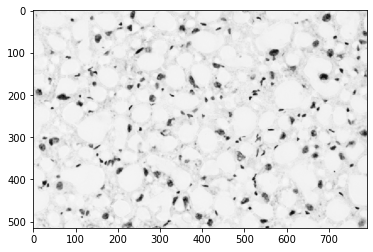

In [ ]:
#so we display the red subplot in the Greys colormap
plt.imshow(r, cmap = 'Greys_r')
#we can use cv2.merge to bring the layers back together

###NDVI

 $$NDVI = \frac{(NIR - RED)}{(NIR + RED)}$$

###Reading multiple images from a folder using glob

In [ ]:
#working folder
folder_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class02'

#import libraries
import glob
import skimage.io as io

#load file paths from folder into list
path_list = glob.glob(f'{folder_path}/images/*.*')#returns a list of file names
print(path_list)

['/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/corn.jpg', '/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/monaLisa.jpg', '/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/ct_scan.jpg', '/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/parrot.jpeg', '/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/mouse_liver.jpg']


/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/corn.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/monaLisa.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/ct_scan.jpg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/parrot.jpeg
/content/drive/MyDrive/71254_2023/01_Lectures/Class02/images/mouse_liver.jpg


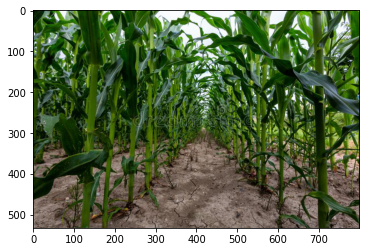

In [ ]:
#iterate over path list and read images into image list
image_list = [] #empty list for storing images from folder
for path in path_list:
  print(path)
  img = io.imread(path) #read file before we add to list
  image_list.append(img) #add image to list, not file names
plt.imshow(image_list[0])

#Lecture 3 

##Pre-lecture videos

###How Blurs & Filters Work

* Kernel convulation - a process where we take a small grid of numbers and pass it over the whole image, transforming it based on those numbers
* Different numbers in the kernel produce different effects
* The kernel is usually smaller than the image
* We put a kernel over a pixel so that it is centered, then take each corresponding image and kernel value, multiply them in pairs, and them sum them up.  Finally, we normalize by dividing by the total value of the kernel. Then we overwrite that pixel with the output (in a different image!).
* If all of the kernel values are 1, that's a mean blur
* Gaussian blur - more controlled and edge-preserving than a mean blur, weighs the numbers based on values from normal distribution
* Standard deviation (std)is the average distance from the mean, and determines how wide the normal distribution bell curve is
* This prioritizes values in the middle (values near the pixel), thus preserving edges

###Digital image filtering and image convolution

* Padding - add extra pixels around edge pixels, with value of zero or the same, etc.  Without padding, output image  will always be smaller than input image. 
* Why do we change the data to float?  Because if you take an 8-bit image and multiply it, you can often get a number larger than its range (in this case, 255).  We can't create a new 8-bit image with values out of range.  Additionally, after we divide we can get a fractional value that leads to rounding errors.  Therefore, converting to float changes all of the values to be between -1 and 1, or 0 and 1.

###Gaussian Filter

* This filter is used for noise reduction in many algorithms that need to detect edges, so that they won't detect noise as an edge.  
* Values in the center of the kernel are larger (brighter)
* This enables object identification more easily than with an average filter or other types of blurring filters
* σ represents the standard deviation, and can define how the Gaussian blur looks like as it affects the normal distribution
$$G(x, y) = \frac{1}{2πσ^2}e^\frac{x^2 + y^2}{2σ^2}$$

* Constant mode means padding with a value of zero

###Image Histograms

* Depict how often intensity values occur in the image
* x-axis - intensity values
* y-axis - occurrences
* A function that changes intensities will change the histogram
* Tone curve - tells you to which value the input intensity is mapped, can be changed to change the tone of the image
* Tone curves can be designed to have specific properties
* Noise variance equalization - all pixels have an equal standard deviation so they all have an equal amount of noise, allowing us to analyze an image with respect to the intensity values
* Histogram equalization - take all the intensity values and redistribute them equally over the range of the histogram.  This increases contrast.

##Class Exercise 3

###Histograms using OpenCV

Function to find histogram in OpenCV:

    hist = cv.calcHist([images], [channels], mask, [histSize], ranges[, hist[, accumulate]])

* Images - source image of type uint8 or float32
* Channel - index of channel for which we calculate histogram.  For grayscale, it is [0].
* Mask - for full image, write 'None'.  For particular region, create mask image and write the mask
* histSize - BIN count.  Full scale is [256]
* Ranges - range of histogram, usually [0, 256]

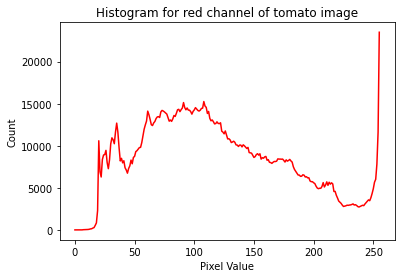

In [ ]:
#red channel histogram of image_tomato from lecture 1
import cv2
img = image_tomato.copy()
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
#our image, first channel(0=red), no mask, 256 bins, range 0-255
plt.plot(hist, color = 'r')
plt.title('Histogram for red channel of tomato image')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

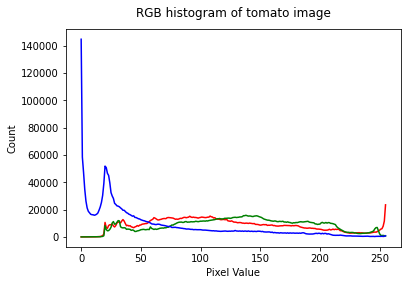

In [ ]:
#histogram for all channels
colors = ('r','g','b') #for line colors
for i,color in enumerate(colors):
  hist = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist, color = color) 
plt.title('RGB histogram of tomato image', y = 1.03) #the y raises title
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

###Histogram using matplotlib

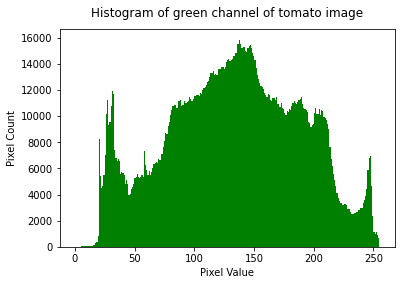

In [ ]:
#plot one channel
hist_plt_green = plt.hist(img[:,:,1].flatten(), bins = 256, color = 'g')
plt.title('Histogram of green channel of tomato image', y = 1.03)
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')
plt.show()

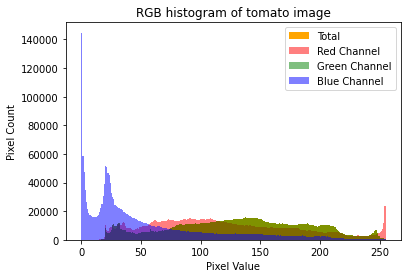

In [ ]:
#plot multiple channels
colors = ('r','g','b')
his_plt = plt.hist(img[:,:,1].flatten(), bins = 256, color = 'orange')

for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)
  #this will choose the corresponding color channel in img
plt.title('RGB histogram of tomato image')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel'])
plt.show()

###Operations on images

####Addition

In order for two images to be added to one another, they must be the same size.  Use the resize command if necessary:

    resized2 = cv2.resize(image, (height, width), interpolation = ___)

Then, add the images:

    if image.shape == resized2.shape:
      added_img = image + resized2
      plt.imshow(added_img)
      plt.title('Two images added together')
    else:
      print('Shapes are different, cannot add.')

Normalizing or using img_as_float can help keep white parts of the image white.  This is because resizing the image loses some information, causing some of the white pixels to become color.

####Multiplication

The image must be converted to float with img_as_float.  Then, the image can be multiplied:

    multiplied = img*2

Then display and/or created a histogram.  Multiplying by greater and greater numbers will lighten the image more and more. 

####Division

Division can be used for change detection, but shows the fractional change or ratio between corresponding pixel values istead of absolute change (as in subtraction).

The image must be converted to float.

    divided = img1/img2

The image will become much brighter.  With subtraction, the image will become darker.

#Lecture 4

##Pre-lecture videos

###Unsharp Mask

* Unsharp is actually an image sharpening tool
* Apply Gaussian smooth, then subtract from original image

$$unsharp = original + (original - blurred) * amount$$
$$f_s(x, y) = f(x, y) + k*(f(x, y) - g(x, y))$$

###Median Filter

* Median - half of the values are below, half are above
* Median filtering is used to denoise an image
* We don't use a mean filter because outliers can cause the mean to be unrepresentative of the actual values, and will create new unrealistic pixel values when the filter straddles an edge

###Bilateral Filter

* Edge-preserving denoising filter, which makes it better than Gaussian
* Replaces each pixel vaue with a weighted average of nearby pixel values
* the σ values control the amount of filter
  * σ_s - spatial - controls the influence of distance pixels
  * σ_r - range - controls the influence of pixels with intensity value different from the pixel's intensity


###Non-Local Means (NLM) Filter

* Edge-preserving denoising filter
* Estimates a value based on the weighted average of all pixels in the image but gives larger weights to similar pixel neighborhoods in the image
* Noisy images with small features of interest are not suitable for this filter, because it is difficult to determine averaging coefficients which leads to over-smoothing

###Sobel Filter

* This is an edge-detection filter - detects regions in the image where there is a sharp change in intensity
* We use kernels for the x and y directions of the image
  * x-direction kernel - negative values on one side, positive on the other, zero down the middle
    * This will find the amount of difference between the two sides of the kernel (to the left and right, not up and down)
      * If all the values are the same, the kernel convolution will be zero
      * The sign of the output doesn't matter
  * y-direction kernel - the same, but with negatives on tope, positives on the bottom, zeros in the middle 
* If we turn this into a normalized image, we will receive a grayscale image with black on one side of edges and white on the other.  However, we want the total of both the x and y kernels
* We can use pythagoras to find the total gradient, since we have the x and y components
* This will give a black and white image with edges in white
* Used for grayscale, not color, so image will need to be converted
* Very noisy due to small kernel, and images change a lot, so use a small Gaussian blur first to denoise
* Uses inverse tan() to find the orientation of the edge

###Canny Edge Detector

* Gets rid of edges we aren't interested in
* Input is output of Sobel, which are thinned to one pixel wide
* Sobel is resolution-dependent, so Canny gets rid of that
* Checks if each pixel is a local max, but we only care if the pixel is a local max in the directions of the edge orientation
  * Therefore, it uses the inverse tan() output of Sobel
* Then uses hysteresis thresholding to remove edges that are weaker (noise)
  * Hysteresis thresholding - two-level thresholding with value t
    * Low t = 0 means no edge, high t = 255 means strong edge
    * Get rid of every pixel < t
    * Use another threshold to only get rid of pixels in that range if they are connected to something above t
    * Do this in two dimensions
* Convert image to grayscale before applying filter

##Class Exercise 4

###Mean Filter

Image must be float.

    mean_kernel = np.full((3, 3), 1/9) #defining our mean kernel (3,3) with values of 1/9
    filtered = ndi.correlate(image, mean_kernel)


###Gaussian Filter

<ipython-input-12-08f274e8f889>:7: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gauss_io = filters.gaussian(image_tomato, sigma = 100)


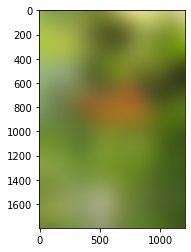

In [ ]:
#in skimage
import skimage as io
from skimage import filters
from skimage import img_as_float

image_float = img_as_float(image_tomato)
gauss_io = filters.gaussian(image_tomato, sigma = 100)
plt.imshow(gauss_io)

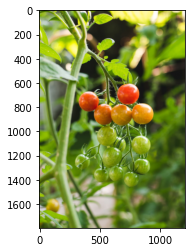

In [ ]:
#in OpenCV
import cv2
gauss_cv2 = cv2.GaussianBlur(image_float, (3,3), 100, borderType = cv2.BORDER_CONSTANT)
plt.imshow(gauss_cv2)
#why doesn't this work?

###Unsharp Mask

<ipython-input-14-0e532262748d>:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_img = gaussian(image_float, sigma = 100, mode = 'constant', cval = 0.0)


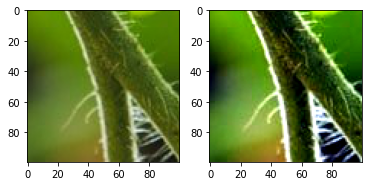

In [ ]:
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

#first apply Gaussian filter
gaussian_img = gaussian(image_float, sigma = 100, mode = 'constant', cval = 0.0)

#then apply unsharped mask equation
unsharped = image_float + (image_float - gaussian_img)*1
plt.subplot(1,2,1)
plt.imshow(image_tomato[500:600, 500:600])
plt.subplot(1,2,2)
plt.imshow(unsharped[500:600, 500:600])

###Sobel Filter

<ipython-input-15-343d20310c5e>:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gauss_new = filters.gaussian(image_tomato, sigma = 5)


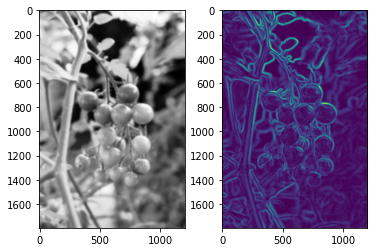

In [ ]:
#noise has a strong impact on sobel, so first denoise with Gauss
gauss_new = filters.gaussian(image_tomato, sigma = 5)

#sobel must be applied to grayscale
from skimage import color
gray_img = color.rgb2gray(gauss_new)
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap = 'Greys_r')#why isn't it gray without cmap?

#then apply sobel
sobel_img = filters.sobel(gray_img)
plt.subplot(1,2,2)
plt.imshow(sobel_img)

###Canny Edge Detector

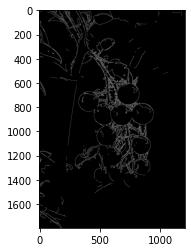

In [ ]:
canny = cv2.Canny(image_tomato, 100, 200)
#the arguments are (image, t1, t2)
plt.imshow(canny, cmap = 'gray')

###Denoising Filters

####Median Filter

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


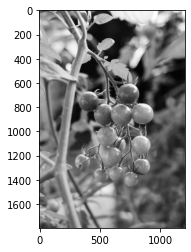

In [ ]:
from skimage.morphology import disk
#disk creates circle similar to mask with specific radius
neighborhood = disk(radius = 1) #matrix of ones with corners equal to zero
gray_8bit = color.rgb2gray(image_tomato)
median_img = filters.rank.median(gray_8bit)
#needs 8-bit, not float
plt.imshow(median_img, cmap = 'gray')
#cmap gray doesn't work without first using color.rgb2gray!

####Bilateral Filter

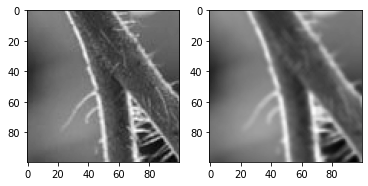

In [ ]:
from skimage import img_as_ubyte
#arguments are (diameter of pixel neighborhood, sigma_r, sigma_s)
gray_ubyte = img_as_ubyte(gray_8bit)
bilateral_img = cv2.bilateralFilter(gray_ubyte, 5, 100, 100, borderType = cv2.BORDER_CONSTANT)

plt.subplot(1,2,1)
plt.imshow(gray_ubyte[500:600, 500:600], cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(bilateral_img[500:600, 500:600], cmap = 'gray')

####Non-Local Means (NLM) Filter

Text(0.5, 1.0, 'NLM')

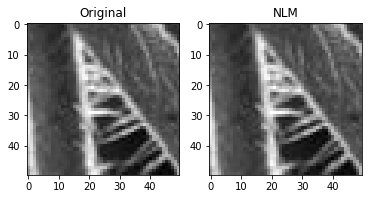

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np

gray_float = color.rgb2gray(image_float)

sigma_est = np.mean(estimate_sigma(gray_float, multichannel = True))

nlm_img = denoise_nl_means(gray_float, h=1.15*sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

plt.subplot(1,2,1)
plt.imshow(gray_float[550:600, 550:600], cmap = 'gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(nlm_img[550:600, 550:600], cmap = 'gray')
plt.title('NLM')
#does it need to be gray? and float?
#I don't see any difference, but maybe I chose a bad image

####Total Variation Filter (TVF)

In [ ]:
from skimage import io
from skimage.restoration import denoise_tv_chambolle
gray_float_clip = gray_float[550:600, 550:600]
tvf_img = denoise_tv_chambolle(gray_float_clip, weight = 0.1, eps = 0.0002, n_iter_max = 200, multichannel = False)

In [ ]:
#for displaying multiple images at once
def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)

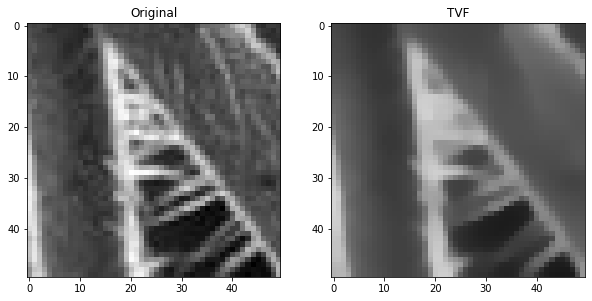

In [ ]:
titles = ['Original', 'TVF']
imshow_all([gray_float_clip, tvf_img], titles = titles)

#Lecture 5

##Pre-lecture videos

###Fourier transform

* How can we take a sound signal which is not a classic sin wave and decompose it into its disparate elements (different notes)?
* We can wrap a wave graph around a circle and create a graph where high sine wave points are far from the origin, and low points are close to the origin
* Two frequencies here: frequency of signal, and frequency that graph is wrapped around circle in [cycles/second] (winding frequency).
* When the winding frequency matches the signal frequency, all high points will be on the right side of the graph, while low points will be on the left
* Winding frequency center of mass wobbles around the origin as it changes, until we approach the signal frequency, in which case it is far to the right
* We can use this to decompose the elements of a signal by checking where there is a spike in the graph of the center of mass
* Useful in sound editing
* Inverse Fourier transform - shows which signal would be produced by a certain transform 
  * Apply the Fourier transform to the Fourier transform
* We use complex numbers to describe the x and y dimensions of the winding graph
  * Why? Euler's formula - e^k*i - gives us the point at which you would reach if you were to walk k units around a circle of radius 1, counterclockwise starting on the right
      * Therefore, we can use the following formula to describe the winding frequency as a function of time: g(t)e^(2πfti)
        * g(t) gives us the changing distance from the origin
      * If we find the integral of the function, divided by the size of the time interval, we will get the center of mass of the wound-up graph
* Lastly, for the actual Fourier transform, we don't divide by the time interval at all.  This means that the longer the signal persists, the more the value of the Fourier transform is scaled up.  Since we find the limit going to infinity, this gives a more accurate value for the center of mass since it takes in the maximum input.
* What does it look like?  It's a new graph g(f) of the signal function which takes the winding frequency as the input (x-axis).  THe output (y-axis) is a complex number, a point in the 2D plane that corresponds to the strength of the frequency in the original signal.

###Fourier transform in image processing

* Randomness - points will cluster at some point
* The Fourier analysis decomposes an image into its various components as sin waves and analyzes the relationships between those components
* The analysis tells us how many waves to break it down to, the ammplitude, etc.
* How do we find out if there is spatial correlation? 
  * Look at the amplitudes (y-axis) and frequencies (x-axis) of the waves that make up the image
    * Entirely random - no peaks
    * Correlation - peak
* Must be float in OpenCV

###Otsu Thresholding

* How can we use a histogram to separate an image into two or more regions?
* Automatic thresholding - assume the system is bimodal and find the cutoff that minimizes the within-group variance (draw only one line)


###Color spaces in Python

* Color spaces - a way to represent color information present in an image
  * e.g. RGB - stores information as Red, Green, and Blue channels, additive color model
    * BGR in OpenCV
* HSV - hue, saturation, value
  * Separates image intensity from color information
  * Useful when you need to change only color intensity and not color information, such as in histogram equalization
* LAB - lightness (consider as a grayscale image), A (from green to red), B (blue to yellow)
  * Useful for when you only need to change the pixel intensity and not the color information


###Forms in Google Colab

* Good for clients that aren't tech-savvy because it's very easy to hide code and it's very customizable
* Can also use Jupyter Widgets

##Class Exercise 5

###Image Filtering

####Fourier Transform

In [ ]:
# function to download an image from a url

import requests # lib to request image from web
import shutil # lib to save the image locally


def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')


# lets download an image of a zebra
url_image = 'https://thumbs.dreamstime.com/b/zebra-isolated-white-19067748.jpg'
img_path = '/content/zebra.jpg'
downloadImageFromURL(url_image, img_path)

Image sucessfully Downloaded:  /content/zebra.jpg


<ipython-input-11-ec1459de1d25>:43: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


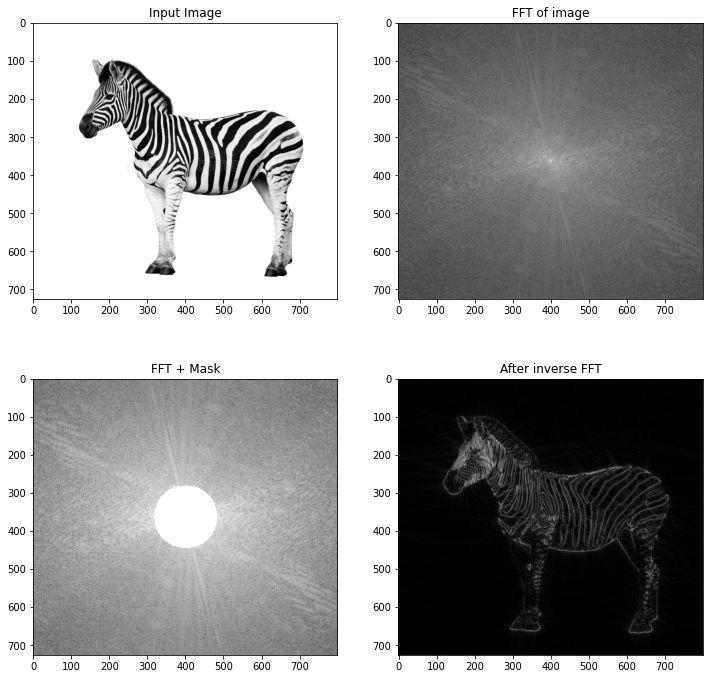

In [ ]:
# imports libs
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

img = cv2.imread(img_path, 0) # load an image

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


# displaying
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

###Segmentation

####Histogram-Based Thresholding

* Change pixels to make image easier to analyze
* Convert to binary image (black and white)
* Used to select an area of interest
* Perform thresholding, then use masks returned by functions to select the part of the image we are interested in

#####Manual

In [ ]:
# lets download an image of rocks
url_image = 'https://img.freepik.com/premium-photo/stacked-large-stones-rocks-field-green-grass-rocks-along-remote-hiking-trail-nature-collected-pile-stones-marking-forest-ground-symbolising-small-grave-hiking-trail_590464-75719.jpg?w=2000'
img_path = '/content/rocks.jpg'
downloadImageFromURL(url_image, img_path)

Image sucessfully Downloaded:  /content/rocks.jpg


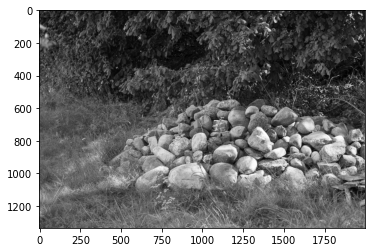

In [ ]:
# imports libs
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

img = io.imread(img_path, as_gray=True) # read in our image of rocks
plt.imshow(img, cmap = 'gray')

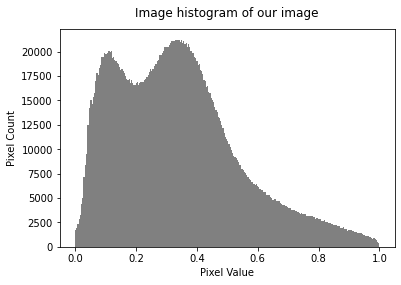

In [ ]:
# show histogram to see which pixel range is good for our zebra
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

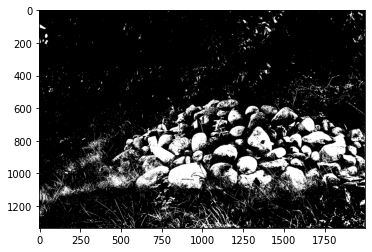

In [ ]:
# Manual thresholding by setting threshold value to numpy array
# After thresholding we will get a binary image.

rocks = (img > 0.55)
plt.imshow(rocks, cmap='gray')

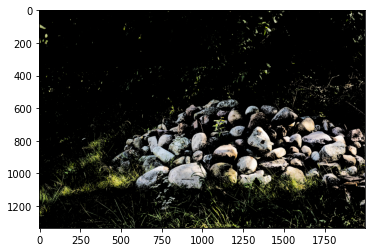

In [ ]:
# display the original image with the mask
rgb_img = io.imread(img_path, as_gray=False) # read in our image of rocks
masked_img = rgb_img.copy()

masked_img[rocks == 0] = 0 # if rocks is False, then zero the pixel in the original image
masked_img[rocks != 0] = rgb_img[rocks != 0] # if rocks is True, then leave the original image
plt.imshow(masked_img) # display

#####Manual in OpenCV

Text(0.5, 1.0, 'Our mask, using cv2')

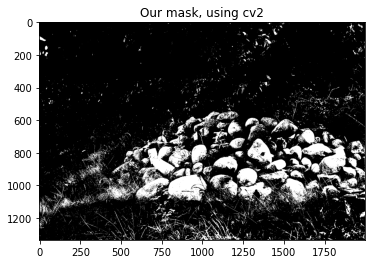

In [ ]:
#all pixels above 0.55 will have pixel value 1

ret1, thresh1 = cv2.threshold(img, 0.55, 1, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')
plt.title('Our mask, using cv2')

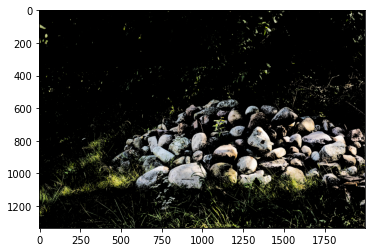

In [ ]:
# display the original image with the mask
rgb_img = io.imread(img_path, as_gray=False) # read in our image of rocks
masked_img = rgb_img.copy()

masked_img[rocks == 0] = 0 # if rocks is False, then zero the pixel in the original image
masked_img[rocks != 0] = rgb_img[rocks != 0] # if rocks is True, then leave the original image
plt.imshow(masked_img) # display

#####Auto-Thresholding with Otsu

######With OpenCV

Threshold value by otsu is:  97.0


Text(0.5, 1.0, 'Our mask, using cv2+otsu')

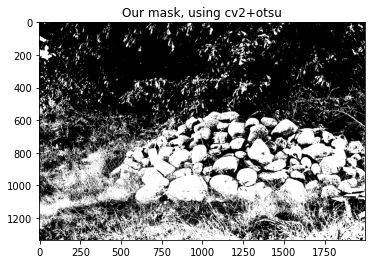

In [ ]:
#this is easier than manually choosing a threshold
#use cv2 for otsu-based automatic thresholding
#cv2.threshold(grayscale image array, thresholdValue, maxVal, thresholdingTechnique)
#maxVal = value give to pixel if more than threshold value
#thresholdValue = value used to classify pixel values
#cv2.THRESH_BINARY = if pixel intensity > threshold, value set to 255, else 0 (black)

from skimage import img_as_ubyte
ret2, thresh2 = cv2.threshold(img_as_ubyte(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Threshold value by otsu is: ', ret2)

plt.imshow(thresh2, cmap = 'gray')
plt.title('Our mask, using cv2+otsu')

######With Skimage

In [ ]:
import skimage.filters

#automatic thresholding
t = skimage.filters.threshold_otsu(img)
print('Found automatic threshold t = ', t, f'({255*t})\n')
#t is between 0 and 1 due to float conversion, so we multiply by 255 (if 8-bit) to get true t

Found automatic threshold t =  0.380859375 (97.119140625)



Text(0.5, 1.0, 'Our mask, using skimage + otsu')

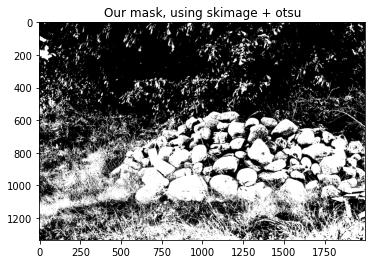

In [ ]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = img > t

# display
plt.imshow(binary_mask, cmap='gray')
plt.title('Our mask, using skimage + otsu')
#this is the mask, not the segmented image!

######Auto Multi-Thresholding

In [ ]:
#this means thresholding with multiple t-values
#lets download an image of a plant
url_image = 'https://www.flowerglossary.com/wp-content/uploads/2019/07/flower.jpg'
img_path = '/content/plant.jpg'
downloadImageFromURL(url_image, img_path)

Image sucessfully Downloaded:  /content/plant.jpg


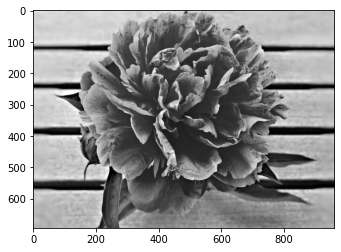

In [ ]:
#imports libs
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

img = io.imread(img_path, as_gray=True) #read in our image of rocks
plt.imshow(img, cmap='gray')
plt.show()

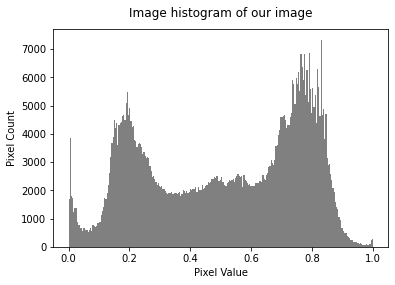

In [ ]:
#show histogram to see pixel value peaks and know how many threshold regions are needed
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

In [ ]:
from skimage.filters import threshold_multiotsu

#apply multi-Otsu threshold
thresholds = threshold_multiotsu(img, classes = 4)
print(thresholds)
#we know to set classes = 4 because we can see about 4 regions in the histogram

[0.28710938 0.50195312 0.69726562]


Since we asked for 4 classes, then we have threshold ranges, of:
1.   0-0.28
2.   0.28-0.49
3.   0.49-0.69
4.   0.69-1

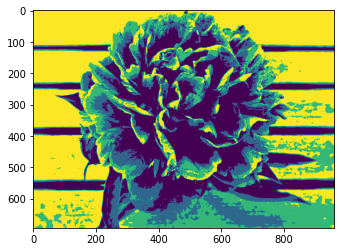

In [ ]:
#digitize (segment) original limage into multiple classes
#np.digitize will segment the given image according to bins argument
regions = np.digitize(img, bins = thresholds) #segment img according to thresholds
plt.imshow(regions)

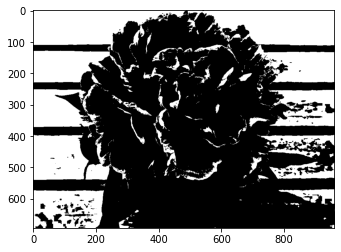

In [ ]:
#let's take a look at region 3
plt.imshow(regions==3, cmap='gray')

#####Using texture to segment images

Image sucessfully Downloaded:  /content/cell.jpg


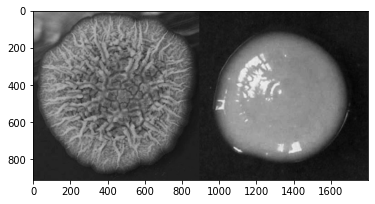

In [ ]:
#lets download an image of a plant
url_image = 'https://journals.asm.org/cms/10.1128/JCM.01249-13/asset/12b11008-28df-4f08-9c51-43f2f96af6c7/assets/graphic/zjm9990930990001.jpeg'
img_path = '/content/cell.jpg'
downloadImageFromURL(url_image, img_path)

img = io.imread(img_path, as_gray=True)
plt.imshow(img,cmap='gray')

######Using Entropy

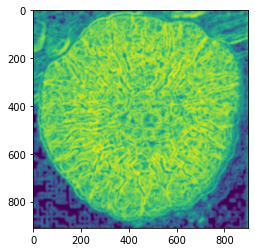

In [ ]:
#this function gives a value that represent the level of complexity in a section
#basically, it quantifies disorder

from skimage.filters.rank import entropy
from skimage.morphology import disk

left_img = img.copy()[:,0:900] #crop the left colony
right_img = img.copy()[:,900:] #crop the right colony

#play with the disk size to get better results
entropy_img = entropy(left_img, disk(7))
#segment according entropy
plt.imshow(entropy_img)
#increasing disk radius will make the image more blurry

3.2916429531786813


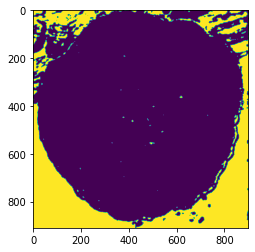

In [ ]:
#use utso to threshold high vs. low entropy regions
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)
print(thresh)

#binarize entropy image
binary = entropy_img <= thresh

plt.imshow(binary)

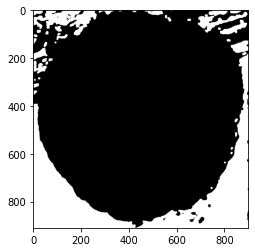

In [ ]:
#get rid of holes in the middle

#define a kernel (change size if needed)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))

#apply kernel to binary (not boolean array, so use img_as_ubyte)
res = cv2.morphologyEx(img_as_ubyte(binary), cv2.MORPH_OPEN, kernel)

plt.imshow(res, cmap = 'gray')

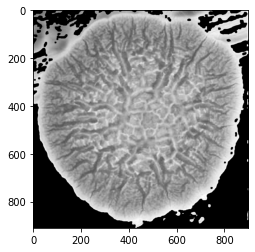

In [ ]:
#display masked image

#inverse the image
new_mask = cv2.bitwise_not(res)

plt.imshow(new_mask*left_img, cmap = 'gray')

#####Using Color Spaces

Image sucessfully Downloaded:  /content/pool.jpg


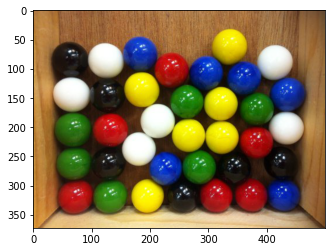

In [ ]:
#lets get a colorful image
url_image = 'https://i5.walmartimages.com/asr/00483292-9759-45f5-b278-ff2bb2cbe611.a4e61dc2974404e551a6a700bdbcdf94.jpeg'
img_path = '/content/pool.jpg'
downloadImageFromURL(url_image, img_path)

from skimage import io,measure

#read our image
img = io.imread(img_path)
plt.imshow(img)

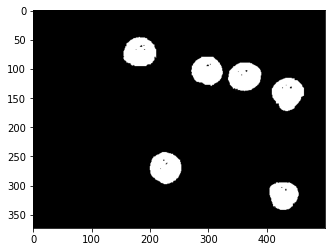

In [ ]:
#convert to hsv color space so we can segment according to color
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #from rgb to hsv

mask = cv2.inRange(hsv, (100,90,90), (120,255,255))
#returns 0 (white) for pixels between given range (img, lower, upper) and 255 (black) for the rest

plt.imshow(mask, cmap = 'gray')

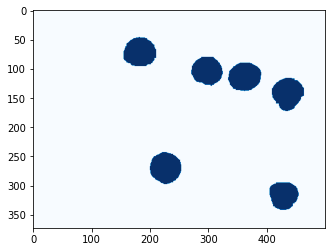

In [ ]:
#close up holes with binary closing
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

plt.imshow(closed_mask, cmap = 'Blues')

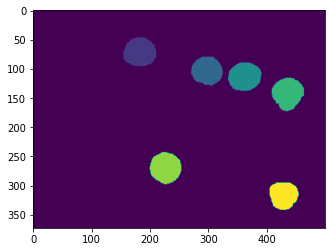

In [ ]:
#label ball each in a different color
label_image = measure.label(closed_mask)
plt.imshow(label_image)

<ipython-input-54-b883dd2f3868>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=img)


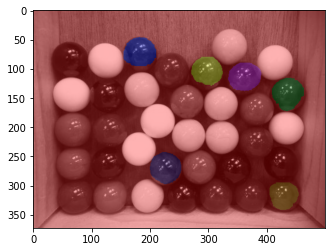

In [ ]:
#return RGB image where labels are painted over image
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [ ]:
#get info about blue balls
props = measure.regionprops_table(label_image, img, properties=['label',
                                               'area', 'equivalent_diameter', 
                                               'mean_intensity', 'solidity'])
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  2225            53.225539         28.575730         57.924944   
1      2  2049            51.077077         16.794046         51.102977   
2      3  2189            52.793194         16.709456         46.675651   
3      4  2284            53.926609         21.630473         50.790280   
4      5  2272            53.784758         21.011884         55.031690   

   mean_intensity-2  solidity  
0        167.670112  0.969922  
1        165.565642  0.968336  
2        156.503883  0.973754  
3        154.237303  0.968617  
4        172.442782  0.973019  


#Lecture 6

##Pre-lecture videos

###Dilation, Erosion, and Structuring Elements

* Dilation - expands connected sets of 1s of a binary image
  * Used for growing features, filling holds and gaps
* Erosion - shrinks the connected sets of 1s of a binary image
  * Used for shrinking features, removing bridges, branches, protrusions
* Structuring element - a shape mask used in basic morphological operations
  * Any shape with a defined origin (usually in the middle)
  * Usually rows of 1s, 0s, sometimes xs

###Watershed Segmentation

* Watershed - the land area that drains water into a common body of water
* Treats the image like a topographical map, with brightness of each pixel representing height, and finds the lines that run along the tops of ridges
* Used for object segmentation
* Needs a grayscale image

###Voronoi Segmentation

* Voronoi diagram - divides plane into separate regions
  * Each region contains one seed
  * Every point in a region is closer to its seed than to any other
* I can blur the image before using the Voronoi in order to limit confusion

###Machine Learning

* Artificial intelligence - using machines to mimic problem-solving and decision-making capabilities of the human mind
* Machine learning - subset of AI focused on self-learning algorithms that derive knowledge from data in order to predict outcomes
  * Supervised learning - use labeled datasets to train algorithms to classify data or predict outcomes - requires human intervention
    * Classification model - recognizes and groups ideas/objects into group or categories
    * Regression - build an equation using input values with weights determined by overall value of their impact on the outcome
  * Unsupervised learning - train an algorithm with unlabeled datasets - doesn't require human intervention 
    * Clustering - the algorithm clusters the data based a characteristic that the algorithm identifies
    * Dimensionality reduction - techniques that reduce the number of input variables in a dataset so that there aren't redundant parameters affecting the outcome
  * Reinforced learning - semi-supervised learning where the agent takes actions in an environment, and the environment punishes or rewards the agent for different actions 
* Deep learning - allows us to use machine learning for large datasets

####K-Means ML for Segmentation

* Unsupervised machine-learning technique that makes inferences with datasets without labels
  * We only give a target number of clusters (k)
  * 'Means' refers to averaging of data to find centroids that define k
    * The first randomly-assigned centroids won't necessarily be correct
      * It takes many iterations for the averages to 'converge' - for the iterations to repeatedly produce similar values
      * After each iteration, the centroid will be moved to the center of the new division, then try again until it converges
* Requires float

##Class Exercise

###Watershed Segmentation

In [ ]:
images_path = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class06/images'

import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import io, img_as_ubyte
import imutils #convenience functions for image processing functions

In [ ]:
#OpenCV reads as BGR, so convert to RGB
img = cv2.imread(f'{images_path}/watershed_coins.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)

error: ignored

In [ ]:
#mean shift filter to ease thresholding
#(img, spatial window radius, color window radius)
mean_shifted = cv2.pyrMeanShiftFiltering(img, 21, 51) 

#convert to grayscale
gray = cv2.cvtColor(mean_shifted, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

error: ignored

In [ ]:
#compute Euclidean Distance Transform (EDT)
#computes the Euclidean distance to closest background pixel for each foreground pixel (coins)
D = ndimage.distance_transform_edt(thresh)

#find local maxima (peaks) in distance map
localMax = peak_local_max(D, indices = False, min_distance = 10, labels = thresh) #20 pixel distance between each peak

#connected component analysis - pixels get labels, same value meas same label
#function takes D as local minima, so take -D
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh) #  matrix of labels
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 9 unique segments found


<ipython-input-6-100c69392367>:6: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices = False, min_distance = 10, labels = thresh) #20 pixel distance between each peak


Object number 1 has an area =  5201.0
Object number 2 has an area =  4019.0
Object number 3 has an area =  2755.5
Object number 4 has an area =  2746.5
Object number 5 has an area =  5047.5
Object number 6 has an area =  5030.0
Object number 7 has an area =  4985.5
Object number 8 has an area =  2637.5
Object number 9 has an area =  2690.0


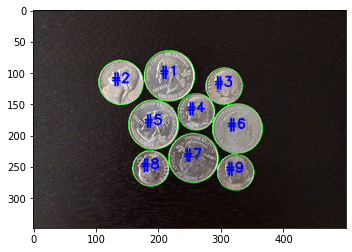

In [ ]:
#loops over unique labels to extract unique objects
total_area = [] # list to store areas of onjects

for i,label in enumerate(np.unique(labels)):
	#if the label is zero, we are examining the 'background'
	#so simply ignore it
	if label == 0:
		continue
	#otherwise, allocate memory for the label region, and set the pixels belonging to the current label to 255 (white). draw it on the mask.
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
  #detect contours in the mask and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
  #calc area and append to list
	area = cv2.contourArea(c)
	total_area.append(area)
	print(f'Object number {i} has an area = ', area)
  #draw the contours enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)  # We find the circumcircle of an object using the function cv.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.
	cv2.putText(img_rgb, "#{}".format(label), (int(x) - 15 , int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) # draw the ID on the object
	cv2.drawContours(img_rgb, cnts, -1, (0,255,0), 1) # draw the counters

plt.imshow(img_rgb)

###Voronoi Segmentation

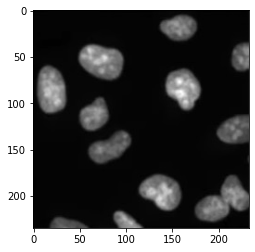

In [ ]:
images_path = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class06/images'

from skimage import io, filters
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

img = io.imread(f'{images_path}/cells.jpg', as_gray = True)
plt.imshow(img, cmap='gray')

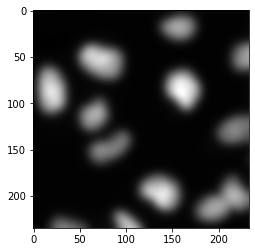

In [ ]:
#Step 1 - Gaussian blur
img_blurred = filters.gaussian(img, sigma = 5)
plt.imshow(img_blurred, cmap = 'gray')

[[ 88 159]
 [ 51  77]
 [203 137]
 [ 99  24]
 [230 106]
 [197 216]
 [108  71]
 [ 15 154]
 [ 54 224]
 [149  72]
 [126 215]
 [136  99]
 [234  34]
 [  0 232]
 [ 89 232]
 [  0  14]
 [  0  75]
 [  0  96]
 [145   0]
 [176  14]
 [  0  36]]


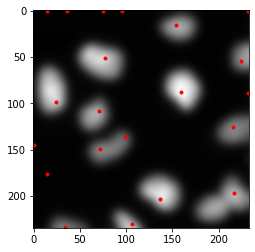

In [ ]:
#Step 2 - find 'seeds' representing each object and plot on image
#find local maxima
from skimage.feature import peak_local_max
coordinates = peak_local_max(img, min_distance = 20, exclude_border = False)
print(coordinates)

plt.imshow(img_blurred, cmap = 'gray')

#plot 'seeds'
plt.plot(coordinates[:,1], coordinates[:,0], 'r.')

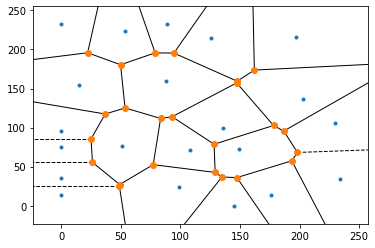

In [ ]:
#Step 3 - find regions using seeds
vor3 = Voronoi(coordinates)
fig3 = voronoi_plot_2d(vor3)
plt.show()

###Voronoi segmentation using pyclesperanto

In [ ]:
#import python file as module
!pwd #interacts with operating system
%cd /content/drive
!pwd
%cd /content/drive/MyDrive/71254_2023/01_Lectures/Class06/scripts
%pwd

/content
/content/drive
/content/drive
/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2023/01_Lectures/Class06/scripts


'/content/drive/.shortcut-targets-by-id/1YejzZF4yTd-VII_OgL9a-frHMMMIsjAy/71254_2023/01_Lectures/Class06/scripts'

In [ ]:
!pip install pyclesperanto-prototype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.0 MB/s 
     |████████████████████████████████| 917 kB 50.6 MB/s 
     |████████████████████████████████| 1.4 MB 40.5 MB/s 
     |████████████████████████████████| 71 kB 9.9 MB/s 
  Created wheel for pytools: filename=pytools-2022.1.13-py2.py3-none-any.whl size=66024 sha256=f89a93be4d5e3d11f3e1102484e401b86f19c536f8af0c408dc856523a498e5f
  Stored in directory: /root/.cache/pip/wheels/b5/c1/bb/26ba70fb9d10f195249ef4e170a92ae83e7534e55b67786fd9
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376772 sha256=674d4c1c9531aad33536fc4e966b44709b757fb831ec348e50a1df6b7ca9f567
  Stored in directory: /root/.cache/pip/wheels/7b/f0/88/0198ac6eca77ffa36e7247595585e9ec34e1dcc327847ebe73
Successfully built pytools transforms3d


In [ ]:
from matplotlib import pyplot as plt
import pyclesperanto_prototype as cle
from skimage import io

In [ ]:
#prepare our GPU
#list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

LogicError: ignored

In [ ]:
#select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#push the image to gpu memory
img_gpu = cle.push(img)
print("Image size in GPU: " + str(img_gpu.shape))

#display using cle (not plt)
cle.imshow(img_gpu, color_map='gray')

LogicError: ignored

In [ ]:
#gaussian blur - helps detect maxima reflecting the objects for seeds
#closer objects --> decreased blurring
img_gaussian = cle.gaussian_blur(img, sigma_x=8, sigma_y=8, sigma_z=8)
plt.imshow(img_gaussian, cmap='gray')

LogicError: ignored

In [ ]:
#find maxima locations for objects
img_maxima_locations = cle.detect_maxima_box(img_gaussian, radius_x=12, radius_y=12, radius_z=12)
#number of maxima = number of objects
number_of_maxima_locations = cle.sum_of_all_pixels(img_maxima_locations) # sums the points detected
print("number of detected maxima locations", number_of_maxima_locations)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
cle.imshow(img_gaussian, plot=axs[0], color_map='gray')
cle.imshow(img_maxima_locations, plot=axs[1], color_map='gray')

NameError: ignored

In [ ]:
#another gaussian blur in order to otsu threshold
img_gaussian2 = cle.gaussian_blur(img, sigma_x=1, sigma_y=1, sigma_z=1)
img_thresh = cle.threshold_otsu(img_gaussian2)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
cle.imshow(img_gaussian2, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')

LogicError: ignored

In [ ]:
#exclude spots in background, only spots on objects
#use binary spots image and binary segmentation
img_relevant_maxima = cle.binary_and(img_thresh, img_maxima_locations)

#new number of points
number_of_relevant_maxima_locations = cle.sum_of_all_pixels(img_relevant_maxima)
print("number of relevant maxima locations", number_of_relevant_maxima_locations)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(img_maxima_locations, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')
cle.imshow(img_relevant_maxima, plot=axs[2], color_map='gray')

In [ ]:
#create mask with voronoi regions
voronoi_separation = cle.masked_voronoi_labeling(img_relevant_maxima, img_thresh)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
cle.imshow(img, plot=axs[0], color_map='gray')
cle.imshow(voronoi_separation, labels=True, plot=axs[1])

#then separate objects using watershed

###Voronoi+Otsu segmentation using pyclesperanto (short)

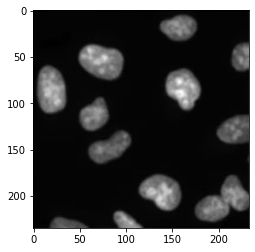

In [ ]:
from skimage import exposure, img_as_ubyte

#normalize and scale to 255, then convert to uint8 using skimage
cells_8bit = img_as_ubyte(img)
plt.imshow(cells_8bit, cmap = 'gray')

In [ ]:
#preparing our GPU

#list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

LogicError: ignored

In [ ]:
#select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#Push the image to gpu memory
cells_gpu = cle.push(cells_8bit)
print("Image size in GPU: " + str(cells_gpu.shape))

#display
cle.imshow(cells_8bit, color_map='gray')

LogicError: ignored

In [ ]:
#arguments are (image, spot_sigma, outline_sigma)
#spot_sigma = depends on how close objects are to each other - low number may divide large objects into multiple objects
#outline_sigma = how precise the outline needs to be for segments (use low number)
segmented = cle.voronoi_otsu_labeling(cells_gpu, spot_sigma = 5, outline_sigma = 1)

cle.imshow(segmented, labels = True)

NameError: ignored

In [ ]:
#number of objects segments - corresponds to maximum intensity in a label image
num_objects = cle.maximum_of_all_pixels(segmented_excl_edges)
print("Total objects detected are: ", num_objects)

NameError: ignored

###K-Means Segmentation

Unflatted image shape: (602, 900, 3)


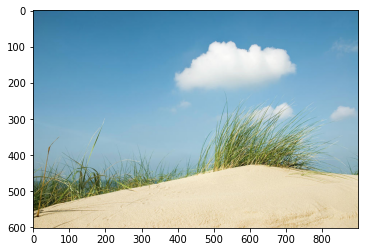

In [ ]:
img = io.imread(f'{images_path}/sand.jpg', as_gray = False)

plt.imshow(img, cmap = 'gray')

#look at image dimensions
print(f'Unflatted image shape: {img.shape}')

In [ ]:
#cv2.kmeans takes 2D array as input, but our image is 3D
#therefore, we need to flatten height and width into a single vector of pixels (3 RGB values)
pixel_values = img.reshape((-1,3)) #-1 means K=MxN instead of K=MxNx3

#convert to float
pixel_values = np.float32(pixel_values)
print(f'Flatted image shape: {pixel_values.shape}')

Flatted image shape: (541800, 3)


In [ ]:
#define criteria - when the criteria is satisfied, algorithm stops
#either when number of iterations is reached
#or when clusters move less than an epsilon value
#use both, and when we reach either one of the values, the algorithm stops

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#define number of clusters (K) - here there are 4 primary colors, so choose k = 4
k = 4

print(criteria)

(3, 100, 0.2)


In [ ]:
#labels for pixels are for clusters the pixel belongs to, refers to center points
#randomly assign cluster values
#attempts - number of iteration using different initial labelings, returns labels with best compactness
#returns (compactness - sum of squared distance from each point to centers, labels - label array, centers - arrary oc cluster centers)
attempts = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

#convert back to 8bit 
centers = np.uint8(centers)

print('unflattened:', labels.shape)

#flatten labels array
labels = labels.flatten()
print('flattened:', labels.shape)

print(centers)

unflattened: (541800, 1)
flattened: (541800,)
[[229 219 193]
 [ 90 103  55]
 [143 183 202]
 [ 79 143 181]]


In [ ]:
#convert all pixels to color of centroid
segmented_image = centers[labels.flatten()]

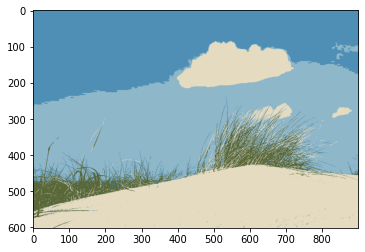

In [ ]:
#reshape to original image dimensions
segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image)

In [ ]:
#exclude pixels that aren't grass (segment grass)
#([90,103,55]) is the grass
#get index of grass row
for i, center in enumerate(centers):
  if np.all(center == ([90,103,55])):
    grass_center_index = i
    print(grass_center_index)

1


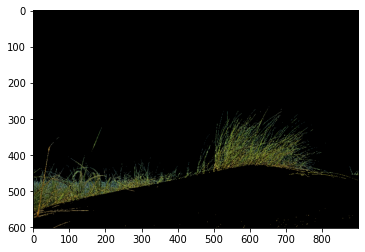

In [ ]:
#copy source img
masked_image = img.copy()

#convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

#color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(grass_center_index) # remove the cluster of grass that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster 3

#convert back to original shape
masked_image = masked_image.reshape(img.shape)

#show the image
plt.imshow(masked_image)

Object has an area =  19119.5 pixels


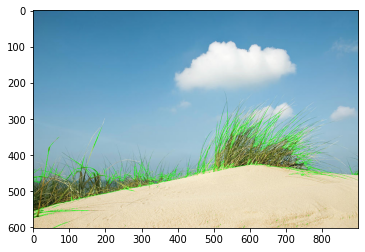

In [ ]:
#detect contours in an image and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY) # color to gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1] # threshold the gray
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # find the boundaries 
cnts = imutils.grab_contours(cnts) 
c = max(cnts, key=cv2.contourArea)

#draw the contours enclosing the object
cv2.drawContours(img, cnts, -1, (0,255,0), 1) # draw the counters

#calc number of pixels within the object and append to list
area = cv2.contourArea(c)
print(f'Object has an area = ', area, 'pixels')

plt.imshow(img, cmap='Greens')

#Lecture 7

##Pre-lecture videos

###Random Forest Classifier

* Traditional machine learning
* Good for sparse data or not a lot of training data
* 'Forest' - a collection of decision trees that end in leaf nodes
  * The algorithm decides which characteristic to classify by
    * Use gini impurity to determine this - what are the chances of ambiguity?
* Supervised machine learning - needs labeled data
  * Use threshold values to classify data
* Disadvantage - overfitting - inacurrate with new data --> use random forest
* Put a bunch of filters on input data --> create bootstrap dataset (same size but only contains 2/3 of original data due to repeats)
  * Randomness comes from bootstrap and from choose a random subset during decision tree
  * Use remainder 1/3 not in bootstrap to verify
  * Chooses label according to majority of decision trees

###Image segmentation with traditional machine learning

1. Divide labeled data into training and testing datasets
2. Apply filters ('feature extractors') and plug into algorithm --> receive trained model
3. Validate trained model with test dataset
4. Save model as pickle file
5. Segment more images